# 1. Import Necessary Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [2]:
import warnings

warnings.filterwarnings('ignore')

# 2. Problem Statement
In this notebook we will learn how to implement how to apply logistic regression in a real world data. We are using open kaglle data set named, "Rain in Australia". It is a 10 year historical rainfall data that comes in csv file format. After doing primary data exploration, we will try to predict next day rainfall for different regions in australia. 

# 3. Loading Dataset
We will first load and import the dataset to work with.

In [3]:
raw_df = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')

# 4. Exploratory Data Analysis with Visualisation

In this step, we would analyze the data set, learn the statistics and correlation between different features

In [4]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


We can see that this dataset contains over 145,000 rows and 23 columns including date, numeric and categorical columns. We will create a model which will predict the RainTomorrow by using other features.



In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

There are significatn amount of missing values in the dataset especially in columns like "sunshine". "Evaporation","Cloud3pm", "cloud9pm". It is also observed that there are different types of data type like object, float64, int64.

Lets look at the basic statistics of the data

In [6]:
raw_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


The stats seem reasonable. So, no data cleaning is required at this time. 

We will now drop rows of missing values in Raintoday and Raintomorrwo columns. 

In [7]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

Now lets visulize the dataset and correlations by plotting some graphs

In [8]:
px.histogram(raw_df, x='Location', title='Location vs. Rainy Days', color='RainToday')

In [9]:
px.histogram(raw_df, 
             x='RainTomorrow', 
             color='RainToday', 
             title='Rain Tomorrow vs. Rain Today')

It is clear that either it will rain tomorrow is greatly dependent on the rainfall today

# Splitting data into train,validation & test data

In [10]:
#setting target column
y = raw_df.RainTomorrow

#removing targets from predictors

X = raw_df.drop(['RainTomorrow'], axis=1)

In [11]:
year = pd.to_datetime(raw_df.Date).dt.year

train_inputs = X[year < 2015]
val_inputs = X[year == 2015]
test_inputs = X[year > 2015]

In [12]:
train_targets = y[year < 2015]
val_targets = y[year == 2015]
test_targets = y[year > 2015]

# Finding Numerical & Categorical Columns

In [13]:
numeric_cols = train_inputs.select_dtypes(include = 'float64').columns.to_list()
cat_cols = train_inputs.select_dtypes(include = 'object').columns.to_list()[1:]

# Dealing with Missing numerical data

## Imputing Missing Values

In [14]:
# checking number of missing values
X[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
#create an imputer
imputer = SimpleImputer (strategy = 'mean')

#fit the imputer in data
imputer.fit(X[numeric_cols])

SimpleImputer()

In [17]:
# filling missing values in train, val and test data
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [18]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

# Scaling Numeric Features

In [19]:
X[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,140319.000000,140480.00000,140787.000000,81093.000000,73982.000000,131682.000000,139732.000000,138256.000000,139270.000000,137286.000000,127044.000000,127018.000000,88162.000000,84693.000000,140131.000000,138163.000000
mean,12.184824,23.23512,2.349974,5.472516,7.630540,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,4.431161,4.499250,16.987066,21.693183
std,6.403879,7.11450,8.465173,4.189132,3.781729,13.578201,8.886210,8.798096,19.063650,20.807310,7.104867,7.035411,2.886594,2.719752,6.496012,6.937784
min,-8.500000,-4.80000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.90000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.60000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.30000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.10000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
scaler.fit(X[numeric_cols])

MinMaxScaler()

In [22]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [23]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000
mean,0.483689,0.525947,0.006396,0.036949,0.525366,0.265107,0.108395,0.215668,0.686309,0.514693,0.612014,0.608705,0.483192,0.493693,0.507089,0.517103
std,0.149458,0.131904,0.022962,0.021628,0.200931,0.102420,0.068800,0.101424,0.189008,0.206376,0.111335,0.106611,0.255486,0.238028,0.134722,0.130726
min,0.000000,0.013233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.000000,0.027426,0.005758
25%,0.377358,0.429112,0.000000,0.026207,0.517241,0.193798,0.053846,0.149425,0.570000,0.370000,0.543802,0.540800,0.333333,0.333333,0.409283,0.422265
50%,0.478774,0.514178,0.000000,0.037741,0.526244,0.255814,0.100000,0.218391,0.690000,0.520000,0.614125,0.610527,0.492351,0.499917,0.502110,0.506718
75%,0.591981,0.618147,0.002156,0.038621,0.634483,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.675200,0.666667,0.666667,0.601266,0.604607
max,1.000000,1.000000,1.000000,0.568276,0.986207,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484


We can see that values in each column lie is in the (0,1) range 


# Handling Categorical Variables

In [24]:
X[cat_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

We will use one hot encoding to the categorical variables

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [27]:
X[cat_cols].isna().sum()

Location          0
WindGustDir    9163
WindDir9am     9660
WindDir3pm     3670
RainToday         0
dtype: int64

In [28]:
X2 = X[cat_cols].fillna('None')

In [29]:
encoder.fit(X2)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [30]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'None', 'S',
        'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'None', 'S',
        'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object

In [31]:
encoded_cols = list(encoder.get_feature_names(cat_cols))

In [32]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[cat_cols].fillna('None'))
val_inputs[encoded_cols] = encoder.transform(val_inputs[cat_cols].fillna('None'))
test_inputs[encoded_cols] = encoder.transform(test_inputs[cat_cols].fillna('None'))

# Training Model with Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression(solver ='liblinear', C=15, fit_intercept= False)

In [35]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(C=15, fit_intercept=False, solver='liblinear')

In [36]:
pd.DataFrame({'feature': numeric_cols+encoded_cols,
            'weight': model.coef_.tolist()[0]})

,feature,weight
0,MinTemp,1.018419
1,MaxTemp,-3.617536
2,Rainfall,3.962377
3,Evaporation,1.391966
4,Sunshine,-1.655916
...,...,...
113,WindDir3pm_W,-0.375577
114,WindDir3pm_WNW,-0.242008
115,WindDir3pm_WSW,-0.459174
116,RainToday_No,-3.288274


In [37]:
print(model.intercept_)

0.0


# Prediction & Model Evaluation

In [38]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [39]:
from sklearn.metrics import accuracy_score

## Confusion Metrics

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 85.23%


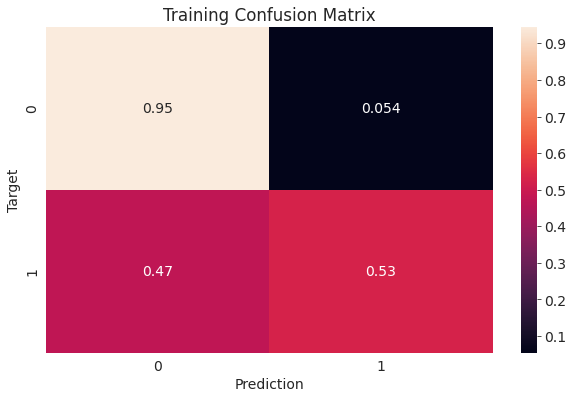

In [42]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 85.42%


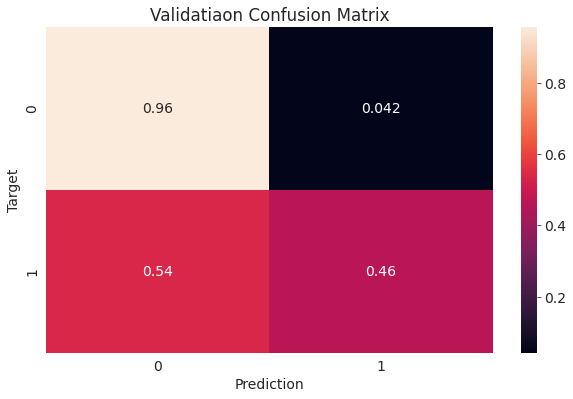

In [43]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 84.23%


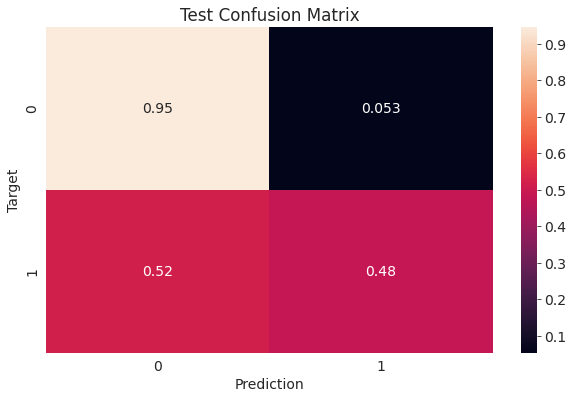

In [44]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

# Training Model with Ridge Classifier

In [45]:
from sklearn.linear_model import RidgeClassifier

In [46]:
model2 = RidgeClassifier(alpha = 10, random_state= 10)

In [47]:
model2.fit(X_train, train_targets)

RidgeClassifier(alpha=10, random_state=10)

In [48]:
#validation score
model2.score(X_val, val_targets)

0.8501960325355492

In [49]:
#test score
model2.score(X_test, test_targets)

0.8403733955659276

# Training Model with Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
model3 = DecisionTreeClassifier( random_state=42, max_leaf_nodes=128, max_depth=10, )

In [52]:
model3.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=128, random_state=42)

In [53]:
model3.score(X_val, val_targets)

0.8472701737960091

In [54]:
model3.score(X_test, test_targets)

0.8334500194476857

# Training model with Random forest classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
model4 = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=7,
                               max_depth=30, 
                               class_weight={'No': 1, 'Yes': 1.5})

In [57]:
model4.fit(X_train, train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [58]:
#validation score
model4.score(X_val, val_targets)

0.8583299198314706

In [59]:
#Test score
model4.score(X_test, test_targets)

0.8476857253986776